# Video Game Sales Prediction

### Top 12% Finish (Out of 404 participants)

This is from a machine learning competition organized by Machine Hack to build a model that accurately predicts the sales in millions for a Video game

Competition link:

https://www.machinehack.com/hackathons/5ef5dcfff86bc10bcd96d915

#### Response Variable: SalesInMillions
#### Evaluation Metric: RMSE

In [1]:
# Set working path
setwd("E:\\Machine Hack\\Video Game Sales Prediction")

In [2]:
# Load libraries
suppressWarnings(library(dplyr))
suppressWarnings(library(caret))
suppressWarnings(library(Metrics))
suppressWarnings(library(MLmetrics))


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall



Attaching package: 'MLmetrics'


The following objects are masked from 'package:caret':

    MAE, RMSE


The following object is masked from 'package:base':

    Recall




In [3]:
# Load dataset

tr <- read.csv("Train.csv",stringsAsFactors = F)
te <- read.csv("Test.csv",stringsAsFactors = F)

In [4]:
# Checking for blanks

colSums(tr=='')
colSums(te=='')

ID         CONSOLE            YEAR        CATEGORY       PUBLISHER 
              0               0               0               0               0 
         RATING  CRITICS_POINTS     USER_POINTS SalesInMillions 
              0               0               0               0

ID        CONSOLE           YEAR       CATEGORY      PUBLISHER 
             0              0              0              0              0 
        RATING CRITICS_POINTS    USER_POINTS 
             0              0              0

No blanks are present

In [5]:
# Checking NAs
round(colSums(is.na(tr))*100/nrow(tr),2)
round(colSums(is.na(te))*100/nrow(te),2)

ID         CONSOLE            YEAR        CATEGORY       PUBLISHER 
              0               0               0               0               0 
         RATING  CRITICS_POINTS     USER_POINTS SalesInMillions 
              0               0               0               0

ID        CONSOLE           YEAR       CATEGORY      PUBLISHER 
             0              0              0              0              0 
        RATING CRITICS_POINTS    USER_POINTS 
             0              0              0

No NAs are present

In [6]:
# Data statistics

str(tr)

'data.frame':	3506 obs. of  9 variables:
 $ ID             : int  2860 731 495 2641 811 1803 1470 3781 325 2380 ...
 $ CONSOLE        : chr  "ds" "wii" "pc" "ps2" ...
 $ YEAR           : int  2008 2012 2019 2002 2013 2004 2008 2014 2004 2008 ...
 $ CATEGORY       : chr  "role-playing" "simulation" "shooter" "sports" ...
 $ PUBLISHER      : chr  "Nintendo" "Konami Digital Entertainment" "Activision" "Electronic Arts" ...
 $ RATING         : chr  "E" "E10+" "M" "E" ...
 $ CRITICS_POINTS : num  2.83 13.2 4.56 4.18 2.26 ...
 $ USER_POINTS    : num  0.3037 1.64 0.00641 0.32692 0.03258 ...
 $ SalesInMillions: num  1.7793 0.215 0.5344 1.384 0.0827 ...


###### We find that there are four character variables which will be treated as categorical variables

In [7]:
summary(tr)

       ID         CONSOLE               YEAR        CATEGORY        
 Min.   :   1   Length:3506        Min.   :1997   Length:3506       
 1st Qu.:1220   Class :character   1st Qu.:2006   Class :character  
 Median :2262   Mode  :character   Median :2009   Mode  :character  
 Mean   :2282                      Mean   :2009                     
 3rd Qu.:3405                      3rd Qu.:2012                     
 Max.   :4523                      Max.   :2019                     
  PUBLISHER            RATING          CRITICS_POINTS    USER_POINTS       
 Length:3506        Length:3506        Min.   : 0.569   Min.   :0.0003406  
 Class :character   Class :character   1st Qu.: 1.738   1st Qu.:0.0659660  
 Mode  :character   Mode  :character   Median : 2.767   Median :0.2333333  
                                       Mean   : 3.791   Mean   :0.4058239  
                                       3rd Qu.: 4.622   3rd Qu.:0.5983333  
                                       Max.   :23.250   Max. 

In [8]:
# Checking unique elements across every column
sapply(tr,function(x){length(unique(x))})

ID         CONSOLE            YEAR        CATEGORY       PUBLISHER 
           2654              17              23              12             204 
         RATING  CRITICS_POINTS     USER_POINTS SalesInMillions 
              6            1683            2202            3506

##### Publisher has many unique categories

## EDA

I use a library called rcompanion for plotting data

In [9]:
suppressWarnings(library(rcompanion))


Attaching package: 'rcompanion'


The following object is masked from 'package:Metrics':

    accuracy




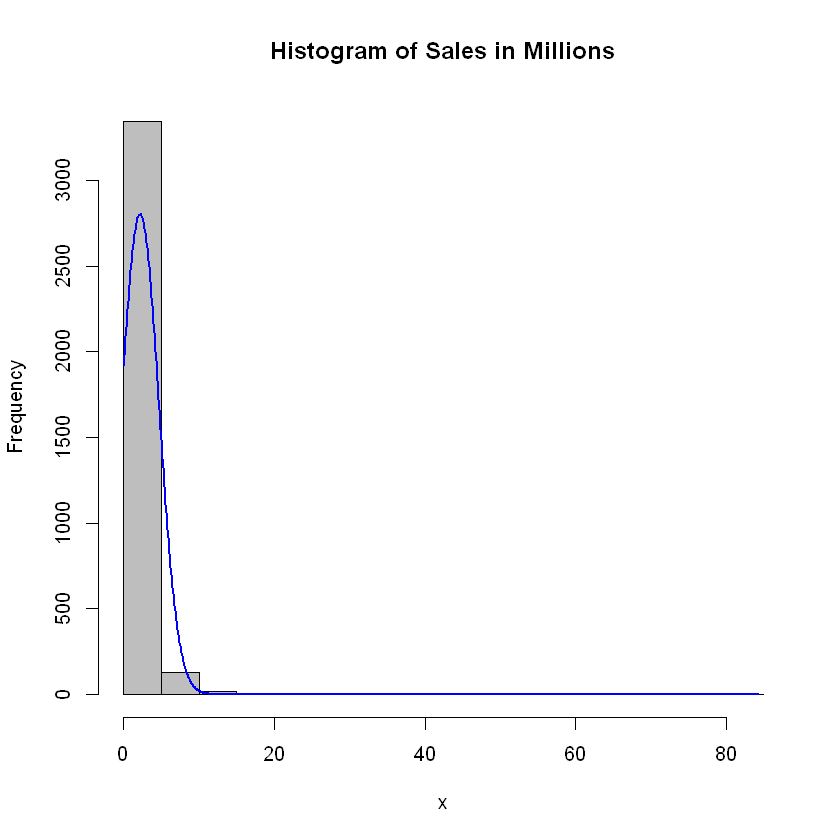

In [10]:
plotNormalHistogram(tr$SalesInMillions,main = "Histogram of Sales in Millions")

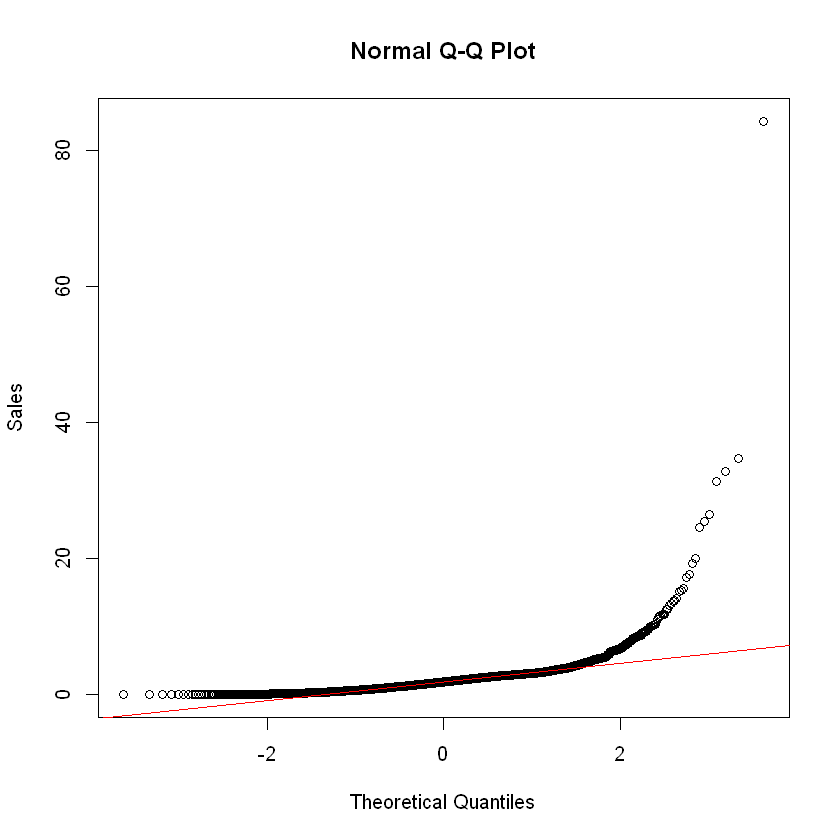

In [11]:
qqnorm(tr$SalesInMillions,
       ylab="Sales")

qqline(tr$SalesInMillions,
       col="red")

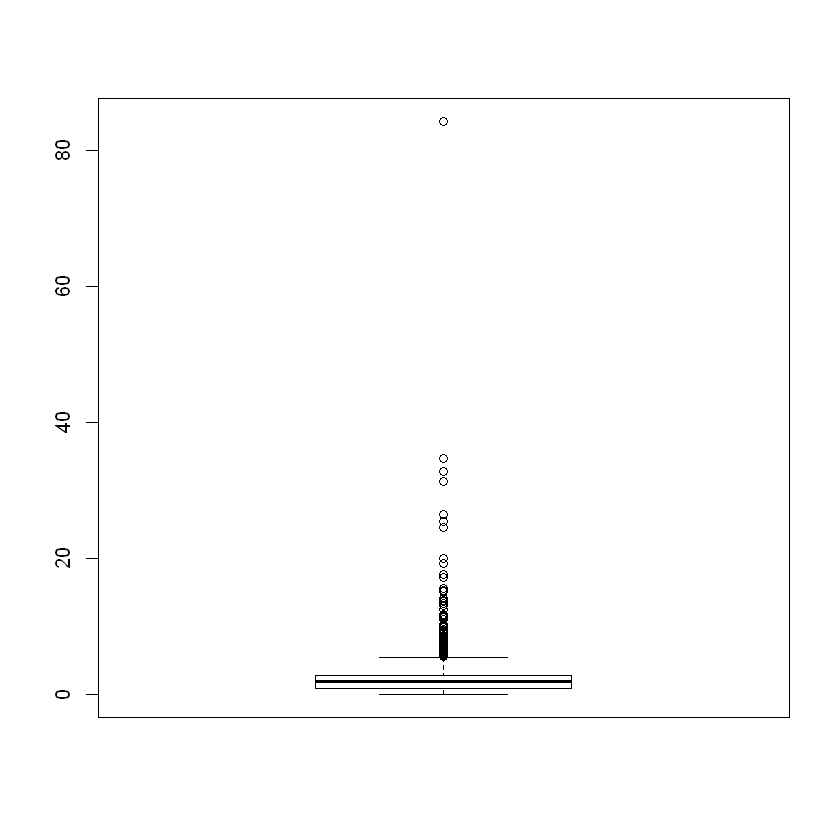

In [12]:
boxplot(tr$SalesInMillions)

##### From the summary and plots, we can find that the distribution of response variable is heavily right skewed and data contains outliers

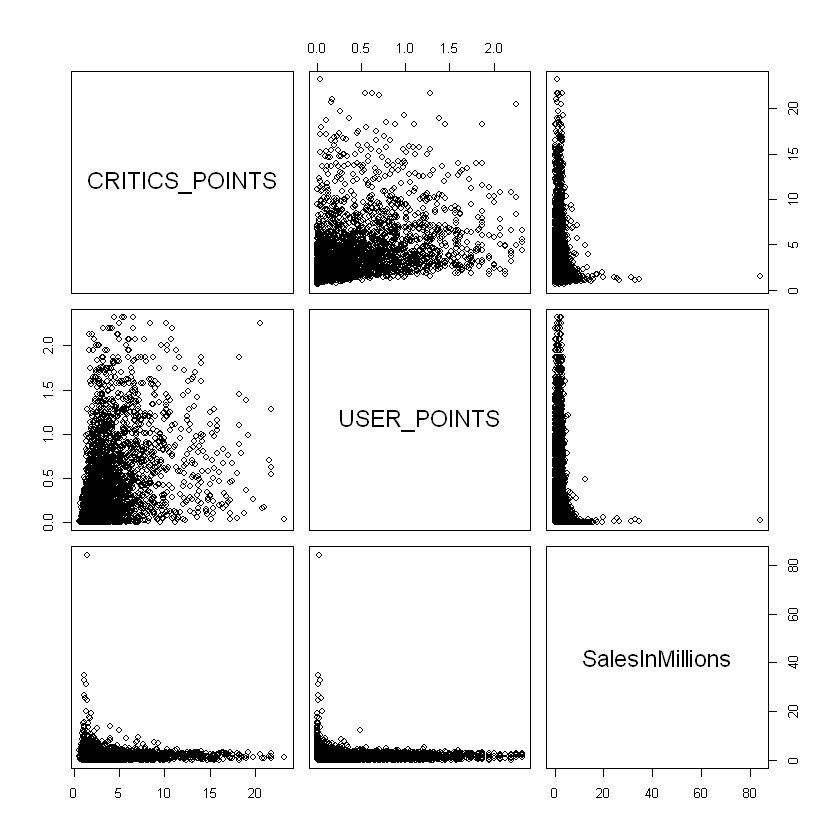

In [13]:
pairs(tr[c('CRITICS_POINTS','USER_POINTS','SalesInMillions')])

Paired plots are provided to explore the relationship between the numerical variables and the response variable  

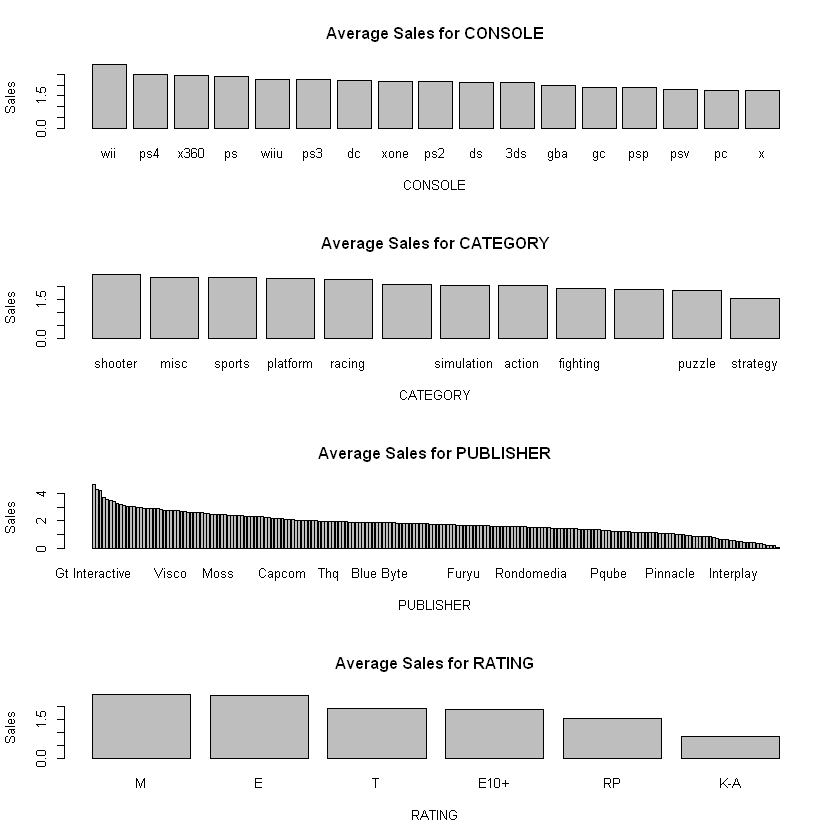

In [14]:
# Average sales for categorical variables
layout(matrix(c(1,1,1,2,2,2,3,3,3,4,4,4), 4, 3, byrow = TRUE))

fact_cols <- c('CONSOLE','CATEGORY','PUBLISHER','RATING')

for (i in fact_cols){
  plot_table <- aggregate(SalesInMillions ~ get(i), data=tr, FUN=mean, na.rm=T)
  plot_table <- plot_table %>% arrange(desc(SalesInMillions))
  names(plot_table)[1] <- i
  barplot(plot_table$SalesInMillions,names = plot_table[,i],
          xlab = i, ylab = "Sales",
          main = paste("Average Sales for",i))
  
}

Wii has the highest average sales in Console <br>
Shooter category sells the highest average sales <br>
Gt Interactive gets the highest average sales <br>
The Rating M generates the highest average sales <br>

In [15]:
### By year

table(tr$YEAR)


1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   2    8    6   23   56   96  177  224  237  230  283  309  300  291  262  215 
2013 2014 2015 2016 2017 2018 2019 
 192  188  124  124   79   52   28 

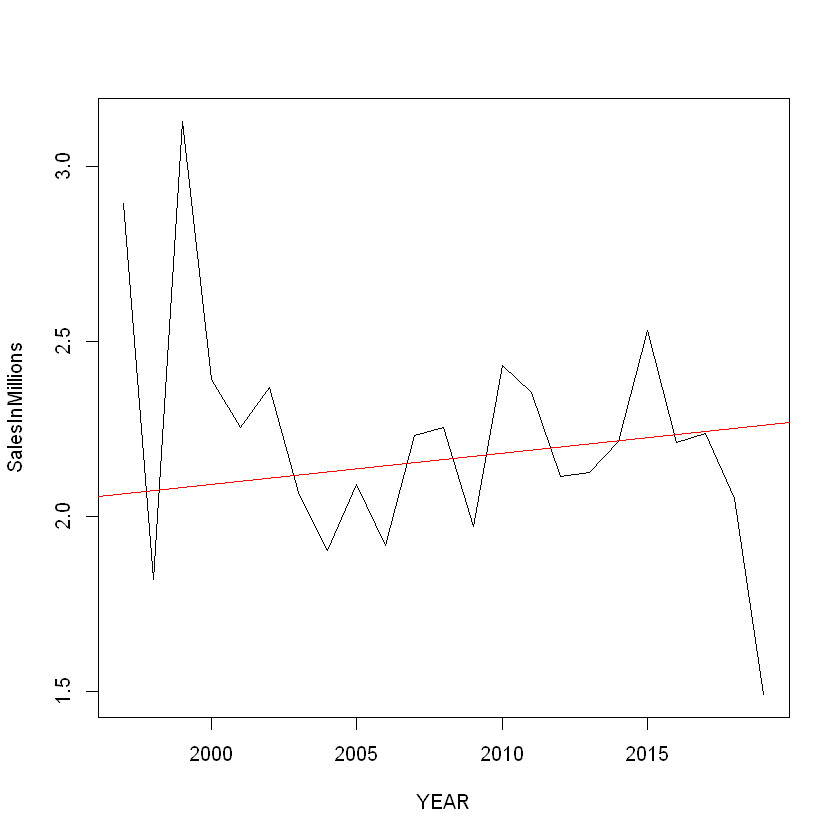

In [16]:
# Plotting avearge sales every year
avg_sales_by_year <- aggregate(SalesInMillions ~ YEAR, data=tr, FUN=mean, na.rm=T)

plot(SalesInMillions ~ YEAR,avg_sales_by_year, type = 'l')
abline(lm(SalesInMillions ~ YEAR,tr),col = "red")

In [17]:
summary(lm(SalesInMillions ~ YEAR,tr))


Call:
lm(formula = SalesInMillions ~ YEAR, data = tr)

Residuals:
   Min     1Q Median     3Q    Max 
-2.250 -1.201 -0.306  0.621 82.073 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -15.853936  19.673725  -0.806     0.42
YEAR          0.008972   0.009793   0.916     0.36

Residual standard error: 2.495 on 3504 degrees of freedom
Multiple R-squared:  0.0002395,	Adjusted R-squared:  -4.582e-05 
F-statistic: 0.8394 on 1 and 3504 DF,  p-value: 0.3596


#### The line chart shows that there is very little relationship between YEAR and Average sales
#### The same is proved statistically


## Feature Engineering

In [18]:
table(tr$CONSOLE)


 3ds   dc   ds  gba   gc   pc   ps  ps2  ps3  ps4  psp  psv  wii wiiu    x x360 
  84    4  246  129  164  315   83  585  438  121  180   59  254   45  266  448 
xone 
  85 

#### Here, the CONSOLE variable is grouped into a broader category called PLATFORM. The sqldf package is used to perform this operation

In [19]:
suppressWarnings(library(sqldf))

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



In [20]:
query1 <- "select *,
case 
when CONSOLE in ('3ds','ds','gba','gc','wii','wiiu') then 'Nintendo'
when CONSOLE like ('ps%') then 'PlayStation'
when CONSOLE like ('x%') then 'Microsoft_Xbox'
when CONSOLE = 'ds' then 'Sega'
else 'Windows' end as PLATFORM
from tr
"

tr <- sqldf(query1)

query2 <- "select *,
case 
when CONSOLE in ('3ds','ds','gba','gc','wii','wiiu') then 'Nintendo'
when CONSOLE like ('ps%') then 'PlayStation'
when CONSOLE like ('x%') then 'Microsoft_Xbox'
when CONSOLE = 'ds' then 'Sega'
else 'Windows' end as PLATFORM
from te
"
te <- sqldf(query2)

#### Another feature called TOTAL_POINTS which is the sum of CRITICS_POINTS and USER_POINTS

In [21]:
tr$TOTAL_POINTS <- tr$CRITICS_POINTS + tr$USER_POINTS
te$TOTAL_POINTS <- te$CRITICS_POINTS + te$USER_POINTS

## Preprocessing Data

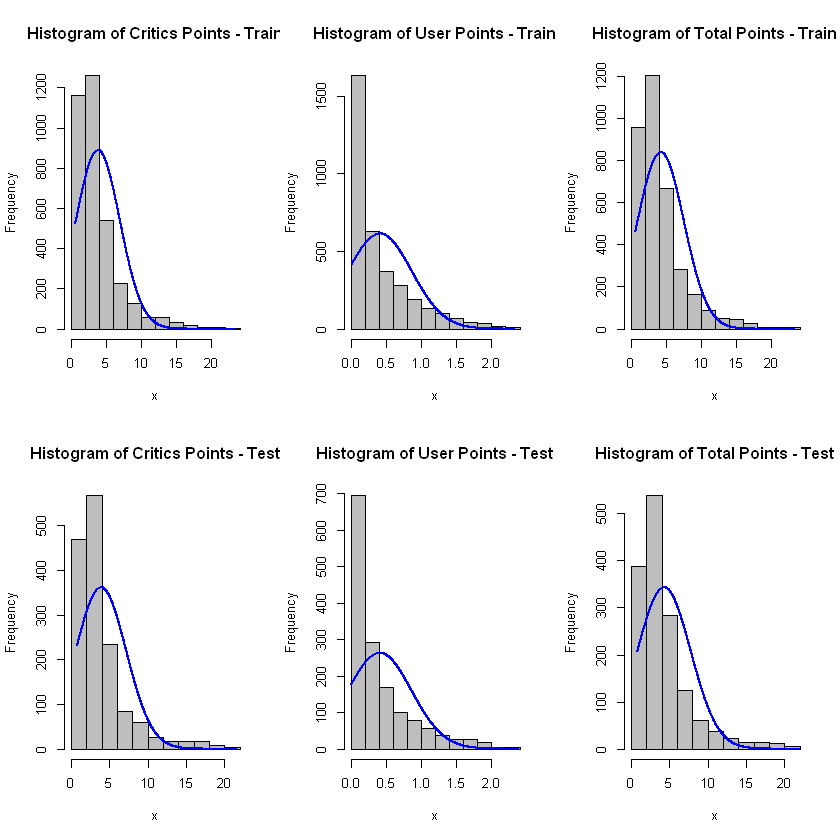

In [22]:
par(mfrow=c(2,3))
plotNormalHistogram(tr$CRITICS_POINTS,main = "Histogram of Critics Points - Train")

plotNormalHistogram(tr$USER_POINTS,main = "Histogram of User Points - Train")

plotNormalHistogram(tr$TOTAL_POINTS,,main = "Histogram of Total Points - Train")

plotNormalHistogram(te$CRITICS_POINTS,main = "Histogram of Critics Points - Test")

plotNormalHistogram(te$USER_POINTS,main = "Histogram of User Points - Test")

plotNormalHistogram(te$TOTAL_POINTS,,main = "Histogram of Total Points - Test")

##### The numerical features show that they are right skewed and need to be preprocessed

In [23]:
# Storing IDs in separate variables

tr_id <- tr$ID
te_id <- te$ID

# Removing IDs
tr$ID <- NULL
te$ID <- NULL

In [24]:
# YEAR is converted to character as only numerical features are preprocessed

tr$YEAR <- as.character(tr$YEAR)
te$YEAR <- as.character(te$YEAR)

# Storing Response variable in separate object

y <- tr$SalesInMillions
tr$SalesInMillions <- NULL

#### The data is preprocessed using preProcess() function from caret package
#### The data is transformed using z-score and Box-Cox to make it standardized and bell shaped

In [25]:
### Standardizing using Z-score and Box-Cox

preProcValues <- preProcess(tr, method = c("center","scale","BoxCox"))

tr <- predict(preProcValues, tr)

preProcValues <- preProcess(te, method = c("center","scale","BoxCox"))

te <- predict(preProcValues, te)

In [26]:
# Storing response variable to train data

tr$y <- y

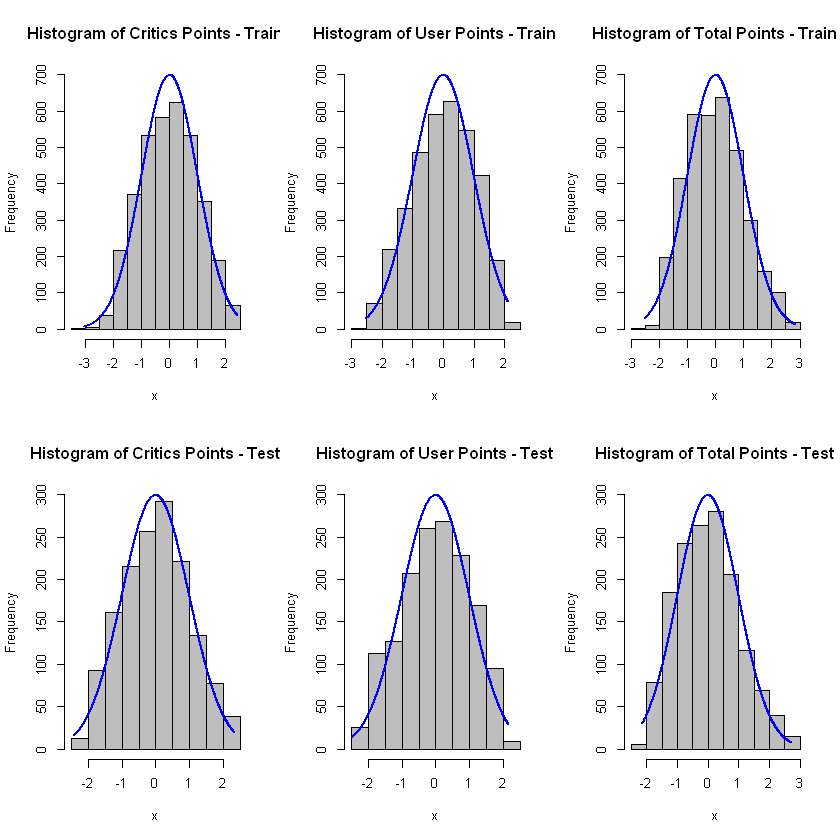

In [27]:
par(mfrow=c(2,3))
plotNormalHistogram(tr$CRITICS_POINTS,main = "Histogram of Critics Points - Train")

plotNormalHistogram(tr$USER_POINTS,main = "Histogram of User Points - Train")

plotNormalHistogram(tr$TOTAL_POINTS,,main = "Histogram of Total Points - Train")

plotNormalHistogram(te$CRITICS_POINTS,main = "Histogram of Critics Points - Test")

plotNormalHistogram(te$USER_POINTS,main = "Histogram of User Points - Test")

plotNormalHistogram(te$TOTAL_POINTS,,main = "Histogram of Total Points - Test")

The data is transformed and looks standardized and bell-shaped

#### Processing Categorical variables

Categorical Variables are CONSOLE, CATEGORY, PUBLISHER, RATING, YEAR and PLATFORM. YEAR is taken to be categorical as the linear relationship with Sales is not significant.

In [28]:
## Processing Categorical Variables

fact_cols <- c('CONSOLE','CATEGORY','PUBLISHER','RATING','YEAR','PLATFORM')


for (i in fact_cols){
  tr[[i]] <- as.factor(tr[[i]])
  te[[i]] <- as.factor(te[[i]])
}

## Modeling

In [29]:
head(tr %>% arrange(desc(y)),10)

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,PLATFORM,TOTAL_POINTS,y
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,wii,2007,sports,Nintendo,E,-1.0331679,-1.2353927,Nintendo,-1.1195148,84.22604
2,wii,2011,racing,Nintendo,E,-1.5758248,-1.5503994,Nintendo,-1.5386677,34.72203
3,wii,2011,sports,Nintendo,E,-1.6254542,-0.9886685,Nintendo,-1.5356062,32.84456
4,ds,2008,platform,Nintendo,E,-1.1909052,-1.3367271,Nintendo,-1.2455944,31.33422
5,wii,2010,platform,Nintendo,E,-1.6409768,-1.4744630,Nintendo,-1.5819312,26.45620
6,wii,2008,sports,Nintendo,E,-1.3347220,-0.8649561,Nintendo,-1.3165751,25.44337
7,ds,2008,racing,Nintendo,E,-1.1201160,-1.3623076,Nintendo,-1.1927343,24.56071
8,x360,2010,misc,Microsoft Game Studios,E,-1.2098747,-0.8013324,Microsoft_Xbox,-1.2185399,20.07628
9,ps3,2015,action,Take-Two Interactive,M,-0.5666069,-2.1221376,PlayStation,-0.7589422,19.29675


#### Since the data has outliers, we remove the outliers by considering Sales < 30

In [30]:
d <- tr[tr$y < 30,]

### A list of algorithms were used to train this model like GBM, XGBoost and Light GBM. Since, this data has more categorical features and some features have many categories, a Catboost algorithm is used to train this model.

#### Catboost is a state-of-the-art boosting algorithm on decision trees developed by Yandex that works well with categorical data.

For more info: https://catboost.ai/

In [31]:
# Load catboost library
suppressWarnings(library(catboost))

In [32]:
target <- "y"

# Features
x <- d[ , -which(names(d) %in% target)]

# Response
y <- d[ , which(names(d) %in% target)]

#### A 10-fold CV is prepared to train the data

In [33]:
# Train control

ctrl <- trainControl(method="cv",     # cross-validation set approach to use
                     number=10,        # k number of times to do k-fold
                     classProbs = FALSE,  # if you want probabilities
                     summaryFunction = defaultSummary,  # for regression
                     allowParallel=T,
                     verboseIter = T
)

#### Hyperparameters used:

depth = Depth of tree <br>
learning_rate = Learning Rate <br>
iterations = Max number of trees that can be built <br>
l2_leaf_reg = L2 regularization <br>
rsm = Percentage of features to use at each split selection <br>
border_count = Number of splits for numerical features <br>

In [34]:
# Hyperparameter grid
grid <- expand.grid(depth = c(6,8),
                    learning_rate = 0.01,
                    iterations = seq(from = 100, to = 1000, by = 100),
                    l2_leaf_reg = 0.001,
                    rsm = 1,
                    border_count = 64)

In [35]:
# Set seed
set.seed(42)

#Train
cat_model <- train(x, y,
                   method = catboost.caret,
                   logging_level = 'Silent',
                   tuneGrid = grid, trControl = ctrl)

+ Fold01: depth=6, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
- Fold01: depth=6, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
+ Fold01: depth=8, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
- Fold01: depth=8, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
+ Fold02: depth=6, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
- Fold02: depth=6, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
+ Fold02: depth=8, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
- Fold02: depth=8, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
+ Fold03: depth=6, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
- Fold03: depth=6, learning_rate=0.01, l2_leaf_reg=0.001, rsm=1, border_count=64, iterations=1000 
+ Fold03: 

In [36]:
# Predict on train data
y_pred5_tr <- predict(cat_model,d)

# Print RMSE
print(RMSE(y_pred5_tr,d$y))

[1] 1.363701


In [37]:
# Predict on test data
y_pred6 <- predict(cat_model,te)

# Store result as a data frame
results <- data.frame(y_pred6)
names(results) <- c("SalesInMillions")

# write.table(results, "Submissions\\cat_2.csv", row.names = F, sep = ",")

#### This generated a score of 1.68011 on the Test data

#### For a complete set of models used, please visit the R code